In [38]:
par(family  = "Arial")
#install.packages("showtext")
library(showtext)
showtext_auto()
options(repr.plot.width=5, repr.plot.height=5)

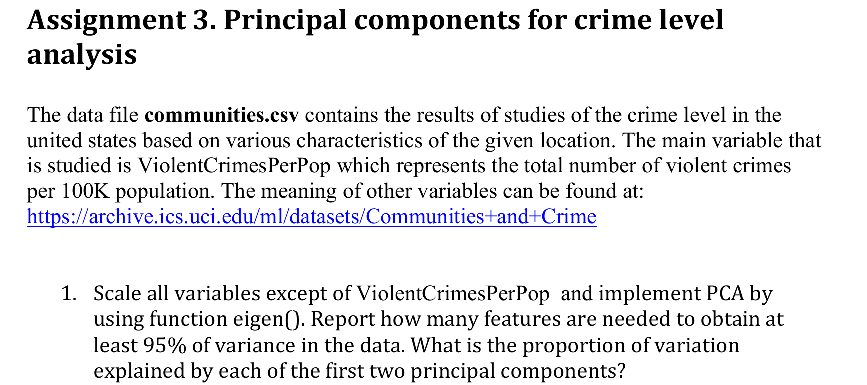

In [2]:
communties2 <- read.csv("communities.csv")


In [3]:
head(communties2,3)

state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
8,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
53,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
24,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43


In [4]:
dim(communties2)

[1] 1994  101

In [5]:
n = which(colnames(communties2) =='ViolentCrimesPerPop')

In [6]:
communties = data.frame(scale(communties2[,1:n-1],center = TRUE,scale = TRUE),
                        'ViolentCrimesPerPop' = communties2[,n])

In [7]:
head(communties,1)

state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
-1.26138,1.04335,-0.8147926,-0.6298437,0.5994272,-0.1612479,0.1117371,-0.5426544,-0.1662442,-0.277853,...,-0.4134034,-0.9244508,-0.1932714,-0.5806077,-0.05816527,0.500363,0.1336658,0.1672741,0.9401634,0.2


In [8]:
df = communties[,-n]

In [9]:
X = cov(df)

In [10]:
dim(X)

[1] 100 100

In [11]:
# #cov = 1/N∗XTX
s.eigen = eigen(X)

In [12]:
lamda.1 = s.eigen$values

In [13]:
percent_lambda = s.eigen$values/sum(s.eigen$values)

In [14]:
sum(cumsum(percent_lambda) <= 0.95 + 1e-3)

[1] 34

we need 34 feature to explain 95% of variation in data. The first two components consisted of 25% and 17% of the total variation.


# b)

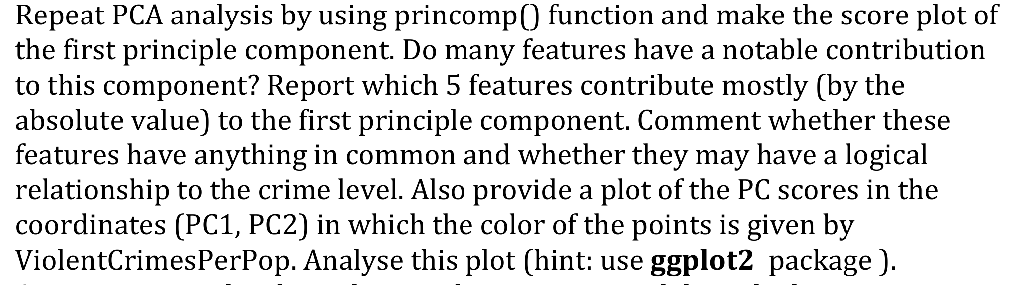

In [15]:
pcaRes = princomp(df)

In [16]:
lambda.2 = pcaRes$sdev^2
x = pcaRes$scores

In [17]:
percent_lambda.2 = lambda.2/sum(lambda.2)

In [18]:
sum(cumsum(percent_lambda.2) <=0.953)

[1] 35

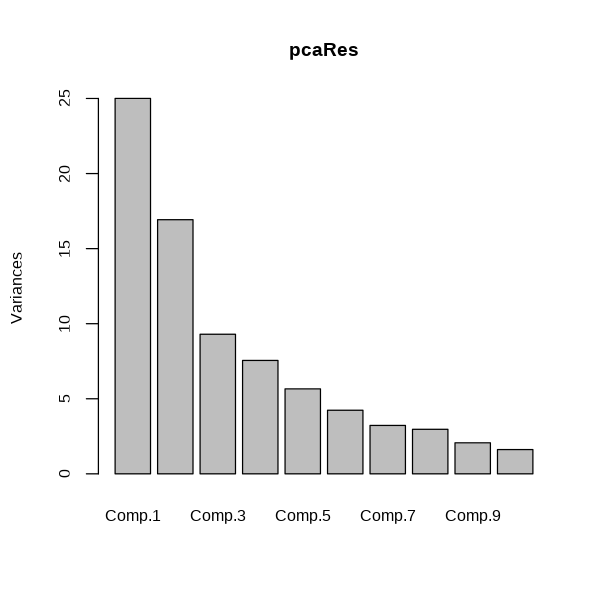

In [19]:
screeplot(pcaRes)

# score plot of first component

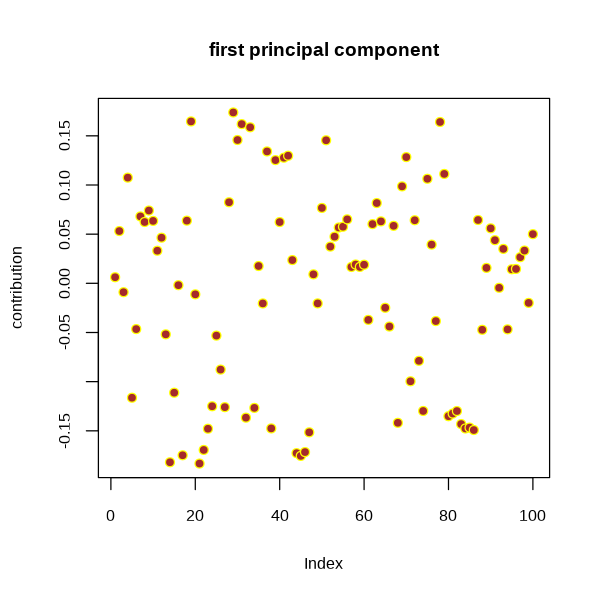

In [20]:
U = pcaRes$loadings
plot(U[,1],pch = 21,col = 7, bg = 'brown',ylab = 'contribution',main = 'first principal component')

The Scoreplot over PC1 shows that it seems around 15 features has a higher absolute value
then 0.15 which means that they have a notable contribution to the first component.
The 5 features that has the biggest contribution to the first component are shown in the
table down. We can see that many of they features has to do with Income and family which
is a very logical relationship to crime level


In [21]:
Abs_features = abs(U[,1])
index = numeric(5)
most_contribute = Abs_features[order(Abs_features, decreasing=TRUE)[1:5]]
names(most_contribute)

[1] "medFamInc"      "medIncome"      "PctKids2Par"    "pctWInvInc"    
[5] "PctPopUnderPov"

In [22]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [23]:
pc12 <- as.data.frame(x[,1:2])
pc12$crimes <- communties$ViolentCrimesPerPop
head(pc12,1)

Comp.1,Comp.2,crimes
-1.332646,0.9044183,0.2


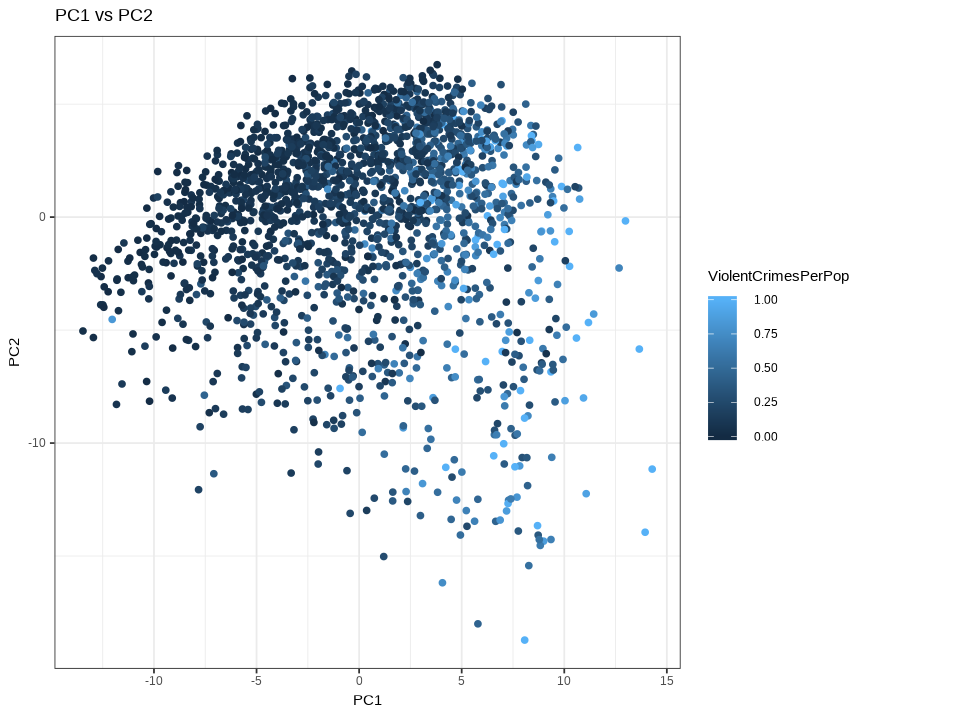

In [24]:
options(repr.plot.width=8, repr.plot.height=6)
ggplot(data = pc12, aes(x=Comp.1, y=Comp.2, color=crimes))+
  geom_point() +
  theme_bw() +
  labs(title = "PC1 vs PC2"  , x = "PC1" , y = "PC2", colour = "ViolentCrimesPerPop")  
  


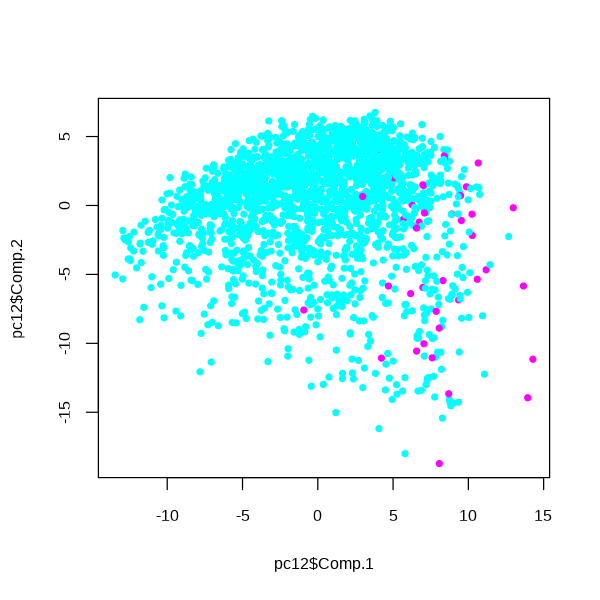

In [25]:
options(repr.plot.width=5, repr.plot.height=5)

plot(pc12$Comp.1,y = pc12$Comp.2,col =as.numeric(pc12$crimes)+5,pch = 20)

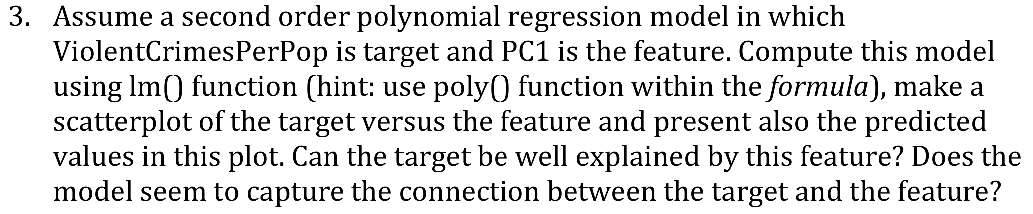

In [34]:
res <- princomp(df)
x <- res$scores
new_x = x[,1]
new_x = data.frame('PC1' = new_x,'ViolentCrimesPerPop'= communties$ViolentCrimesPerPop)
df2 = new_x[order(new_x[,1]),]  #you have to order it otherwise it messes the plot
#df2 = new_x

In [35]:
head(df2)

,PC1,ViolentCrimesPerPop
1501,-13.46145,0.04
1491,-12.95244,0.03
140,-12.95048,0.02
1159,-12.88260,0.06
1616,-12.77904,0.06
658,-12.59534,0.07


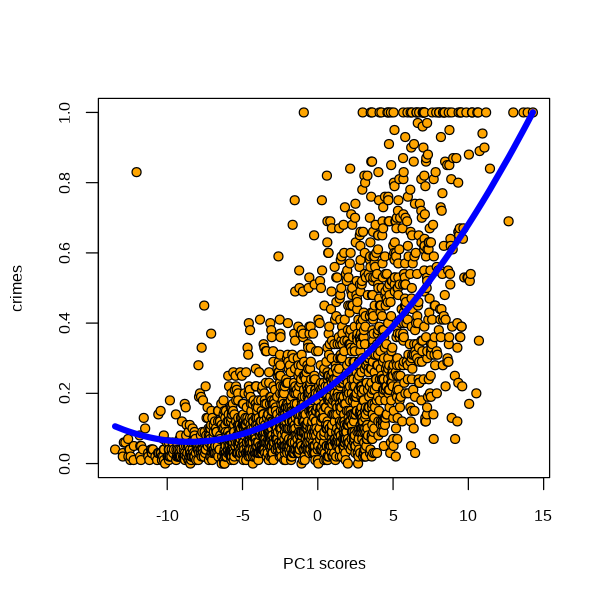

In [41]:
poly.model = lm(ViolentCrimesPerPop ~ poly(PC1,2,raw = TRUE) , df2)
prediction = predict(poly.model)
plot(x=df2$PC1,y=df2$ViolentCrimesPerPop,pch=21,bg='orange',ylab='crimes',xlab='PC1 scores')
lines(x = df2$PC1 , y= poly.model$fitted.values , col ='blue' , lwd = 5 )


The plotting of the violent crimes over the scores of PC1 seems to show a general trend for the
violent crimes. It is not perfect, but a general trend emerges. This trend is not fully captured by
the line, as the dots have a rather wide spread, but it follows it well. Therefore the model does a
good job of estimating the violent crimes per per population.


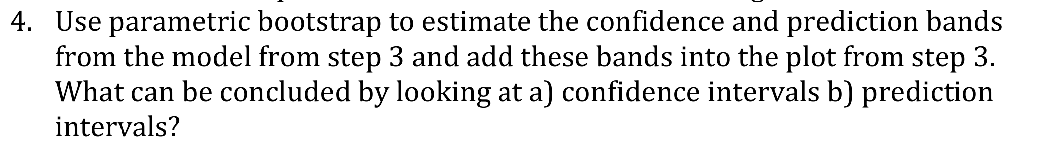

In [57]:
library(boot)
res <- princomp(df)
x <- res$scores
new_x = x[,1]
new_x = data.frame('PC1' = new_x,'ViolentCrimesPerPop'= communties$ViolentCrimesPerPop)
df2 = new_x[order(new_x[,1]),] 

In [78]:
mle = lm(ViolentCrimesPerPop ~ poly(PC1,2) , df2)

rng = function(data,mle){
    data1 = data.frame('ViolentCrimesPerPop' = data$ViolentCrimesPerPop,'PC1' = data$PC1 )
    n = length(data$PC1)
    # generate new PC1
    data1$ViolentCrimesPerPop = rnorm(n,predict(mle,newdata = data1),sd(mle$residuals))     
    return(data1)
    }

f1 = function(data1){                        
    res =  lm(ViolentCrimesPerPop ~ poly(PC1,2) , data1) #fit linear model
    #predict crime for all PC1 from original data
    crimeP = predict(res,newdata=data2)
    return(crimeP)
}
          res = boot(data2, statistic = f1,R = 3000, mle = mle,ran.gen = rng,sim = 'parametric')             


# plot of confidence band

In [79]:
e = envelope(res)


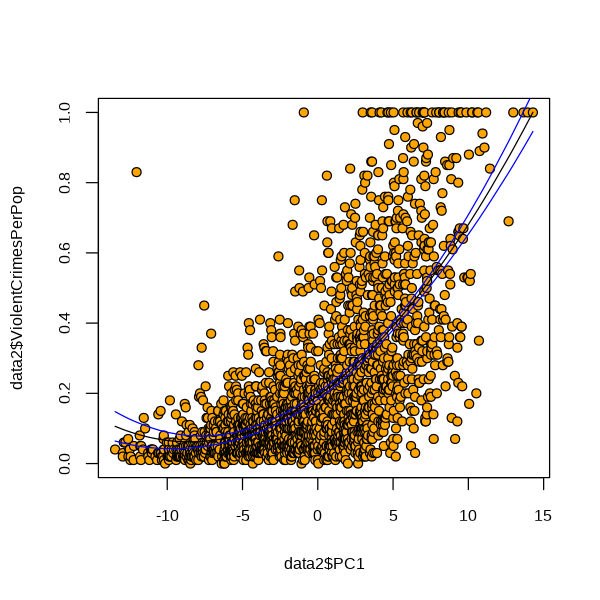

In [80]:
fit = lm(ViolentCrimesPerPop ~ poly(PC1,2) , data2)
crimeP = predict(fit)
plot(y=data2$ViolentCrimesPerPop, x=data2$PC1, pch=21, bg="orange")
points(x=data2$PC1,y=crimeP,type="l") #plot fitted line
#plot cofidence bands
points(x=data2$PC1,e$point[2,], type="l", col="blue")
points(x=data2$PC1,e$point[1,], type="l", col="blue")


# plot of prediction band

In [81]:
mle = lm(ViolentCrimesPerPop ~ poly(PC1,2) , df2)


f1 = function(data1){                        
    res =  lm(ViolentCrimesPerPop ~ poly(PC1,2) , data1) #fit linear model
    #predict crime for all PC1 from original data
    crimeP = predict(res,newdata=data2)
    n = length(data1$PC1)
    PredictedCrime = rnorm(n , mean=crimeP,sd = sd(mle$residuals) )
    return(PredictedCrime)
}
    
res = boot(data2, statistic = f1,R = 10000, mle = mle,ran.gen = rng,sim = 'parametric')             


Warning message in envelope(res):
“unable to achieve requested overall error rate”

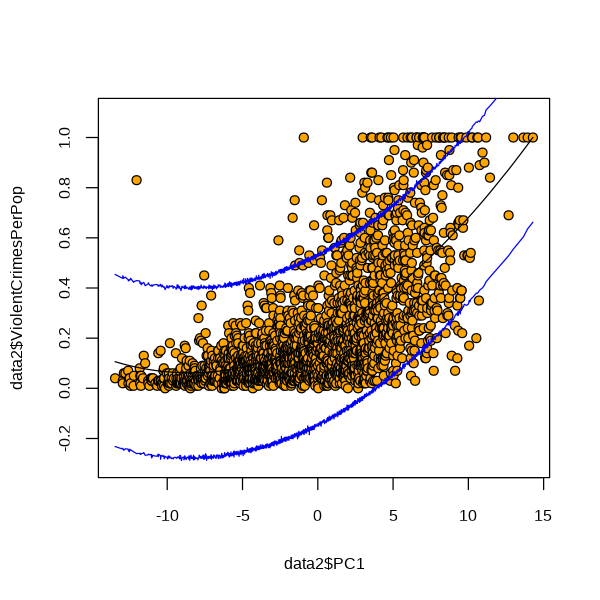

In [83]:
e = envelope(res)
fit = lm(ViolentCrimesPerPop ~ poly(PC1,2) , data2)
crimeP = predict(fit)
plot(y=data2$ViolentCrimesPerPop, x=data2$PC1, pch=21, bg="orange",ylim=c(-0.3,1.1))
points(x=data2$PC1,y=crimeP,type="l") #plot fitted line
#plot cofidence bands
points(x=data2$PC1,e$point[2,], type="l", col="blue")
points(x=data2$PC1,e$point[1,], type="l", col="blue")

The plot above shows the plot from task 3 but now with prediction intervals. You can see that the predictions bands have almost the same width all over the plot and that the intervals alot of the points in the plot. This is because prediction is made out of every fitted point instead of confidence interval which is made out of the fitted line. 